# Cassava Leaf Disease Classification - Exploratory Data Analysis

Quick Exploratory Data Analysis for [Cassava Leaf Disease Classification](https://www.kaggle.com/c/cassava-leaf-disease-classification) challenge

![](https://storage.googleapis.com/kaggle-competitions/kaggle/13836/logos/header.png)

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:black; background:#5BEB9C; border:0' role="tab" aria-controls="home"><center>Quick Navigation</center></h3>

* [1. Overview](#1)
* [2. General Visualization](#2)
* [3. Cassava Bacterial Blight (CBB)](#3)
* [4. Cassava Brown Streak Disease (CBSD)](#4)
* [5. Cassava Green Mottle (CGM)](#5)
* [6. Cassava Mosaic Disease (CMD)](#6)
* [7. Healthy](#7)
    
    
* [Augmentation examples](#50)
    
    
* [Submission Example](#100)

<a id="1"></a>
<h2 style='background:#5BEB9C; border:0; color:black'><center>Overview<center><h2>

In [1]:
import os
import json

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import cv2
import albumentations as A

In [2]:
BASE_DIR = "../input/cassava-leaf-disease-classification/"

In this competition we have 5 classes: **4 diseases** and **1 healthy**   
We can find the mapping between the class number and its name in the file label_num_to_disease_map.json

In [3]:
with open(os.path.join(BASE_DIR, "label_num_to_disease_map.json")) as file:
    map_classes = json.loads(file.read())
    
print(json.dumps(map_classes, indent=4))

{
    "0": "Cassava Bacterial Blight (CBB)",
    "1": "Cassava Brown Streak Disease (CBSD)",
    "2": "Cassava Green Mottle (CGM)",
    "3": "Cassava Mosaic Disease (CMD)",
    "4": "Healthy"
}


In [4]:
input_files = os.listdir(os.path.join(BASE_DIR, "train_images"))
print(f"Number of train images: {len(input_files)}")

Number of train images: 21397


Let's take a look at the dimensions of the first 300 images   
As you can see below, all images are the same size (600, 800, 3)

In [5]:
img_shapes = {}
for image_name in os.listdir(os.path.join(BASE_DIR, "train_images"))[:300]:
    image = cv2.imread(os.path.join(BASE_DIR, "train_images", image_name))
    img_shapes[image.shape] = img_shapes.get(image.shape, 0) + 1

print(img_shapes)

{(600, 800, 3): 300}


Let's load the training dataframe and add a column with the real class name to it.

In [6]:
df_train = pd.read_csv(os.path.join(BASE_DIR, "train.csv"))

df_train["class_name"] = df_train["label"].astype(str).map(map_classes)

df_train

image_id  label                           class_name
0      1000015157.jpg      0       Cassava Bacterial Blight (CBB)
1      1000201771.jpg      3         Cassava Mosaic Disease (CMD)
2       100042118.jpg      1  Cassava Brown Streak Disease (CBSD)
3      1000723321.jpg      1  Cassava Brown Streak Disease (CBSD)
4      1000812911.jpg      3         Cassava Mosaic Disease (CMD)
...               ...    ...                                  ...
21392   999068805.jpg      3         Cassava Mosaic Disease (CMD)
21393   999329392.jpg      3         Cassava Mosaic Disease (CMD)
21394   999474432.jpg      1  Cassava Brown Streak Disease (CBSD)
21395   999616605.jpg      4                              Healthy
21396   999998473.jpg      4                              Healthy

[21397 rows x 3 columns]

Let's look at the number of pictures in each class.

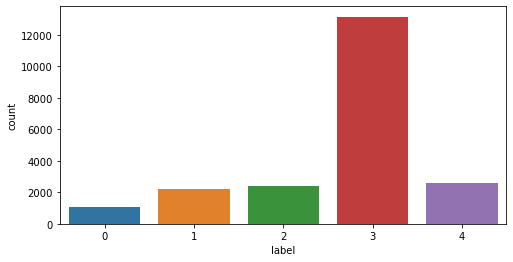

In [7]:
plt.figure(figsize=(8, 4))
sn.countplot(x="label", data=df_train);

As we can see, the dataset has a fairly large imbalance.

<a id="2"></a>
<h2 style='background:#5BEB9C; border:0; color:black'><center>General Visualization<center><h2>

In [8]:
def visualize_batch(image_ids, labels):
    plt.figure(figsize=(16, 12))
    
    for ind, (image_id, label) in enumerate(zip(image_ids, labels)):
        plt.subplot(3, 3, ind + 1)
        image = cv2.imread(os.path.join(BASE_DIR, "train_images", image_id))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image)
        plt.title(f"Class: {label}", fontsize=12)
        plt.axis("off")
    
    plt.show()

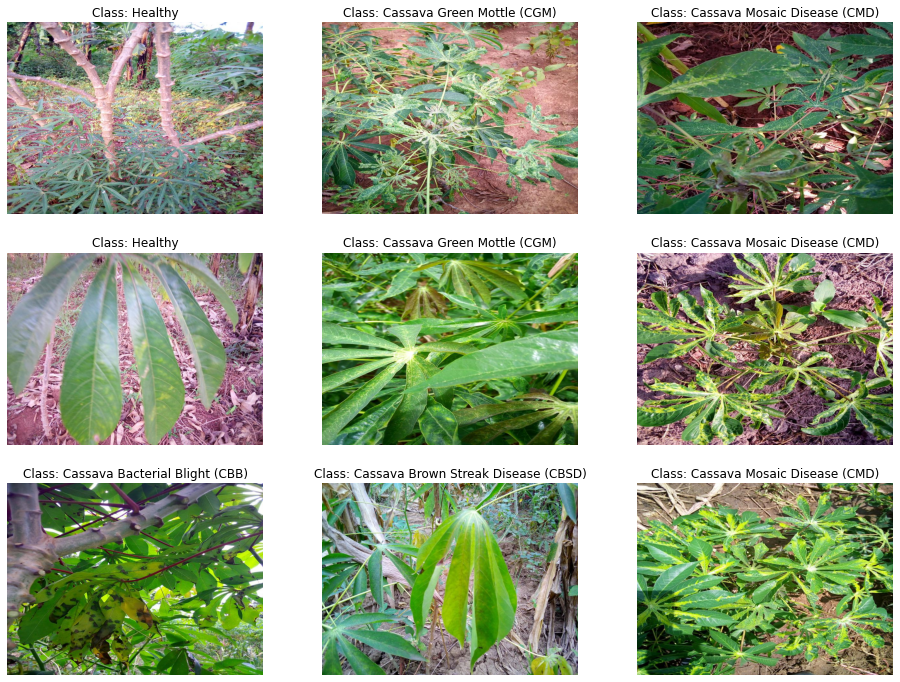

In [9]:
tmp_df = df_train.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["class_name"].values

visualize_batch(image_ids, labels)

<a id="3"></a>
<h2 style='background:#5BEB9C; border:0; color:black'><center>Cassava Bacterial Blight (CBB)<center><h2>

<img style="height:300px" src="https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F1865449%2Fbe9cdd94efb9b1660066ad10b55c8626%2Fbact_bright.jpeg?generation=1605827469211692&alt=media">
<cite>The image from discussion: <a href="https://www.kaggle.com/c/cassava-leaf-disease-classification/discussion/198143">Cassava Lead Diseases: Overview</a></cite>

Total train images for class 0: 1087


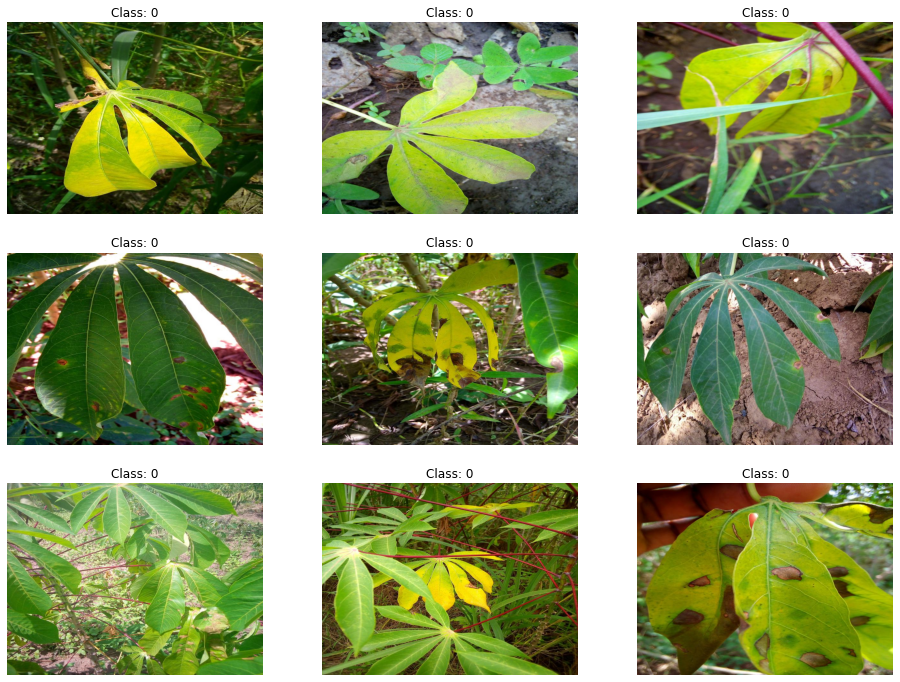

In [10]:
tmp_df = df_train[df_train["label"] == 0]
print(f"Total train images for class 0: {tmp_df.shape[0]}")

tmp_df = tmp_df.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["label"].values

visualize_batch(image_ids, labels)

<a id="4"></a>
<h2 style='background:#5BEB9C; border:0; color:black'><center>Cassava Brown Streak Disease (CBSD)<center><h2>

<img style="height:300px" src="https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F1865449%2Ffeba3dafc914d04517659650d137b77a%2Fbrown_st.jpeg?generation=1605830407530983&alt=media">
<cite>The image from discussion: <a href="https://www.kaggle.com/c/cassava-leaf-disease-classification/discussion/198143">Cassava Lead Diseases: Overview</a></cite>

Total train images for class 1: 2189


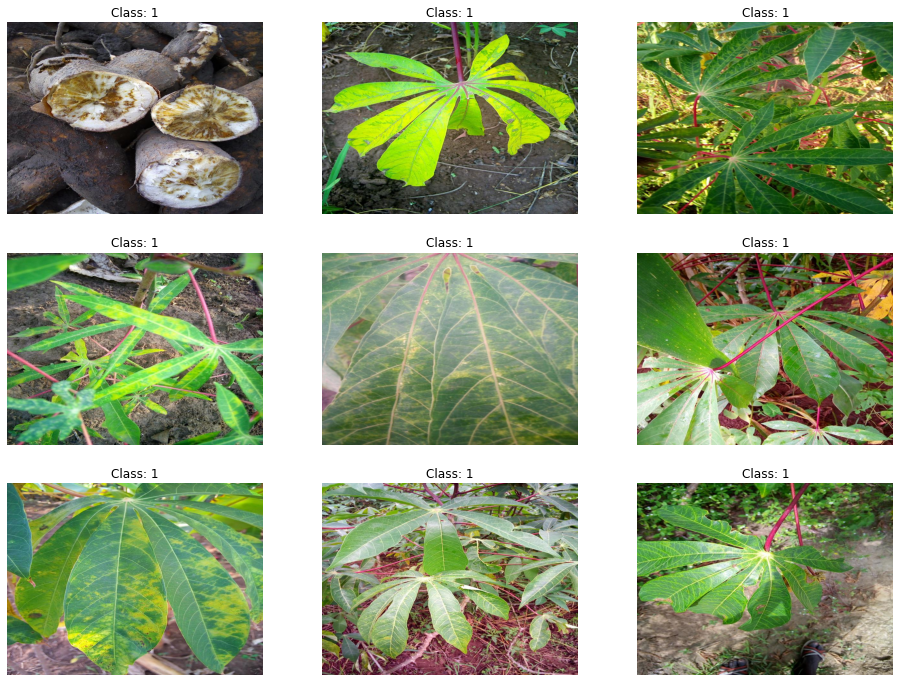

In [11]:
tmp_df = df_train[df_train["label"] == 1]
print(f"Total train images for class 1: {tmp_df.shape[0]}")

tmp_df = tmp_df.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["label"].values

visualize_batch(image_ids, labels)

<a id="5"></a>
<h2 style='background:#5BEB9C; border:0; color:black'><center>Cassava Green Mottle (CGM)<center><h2>

<img style="height:300px" src="https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F1865449%2F4f2975866feb2a1d4ef4111c2d57db29%2Fgreen_mottle.jpeg?generation=1605829101431013&alt=media">
<cite>The image from discussion: <a href="https://www.kaggle.com/c/cassava-leaf-disease-classification/discussion/198143">Cassava Lead Diseases: Overview</a></cite>

Total train images for class 2: 2386


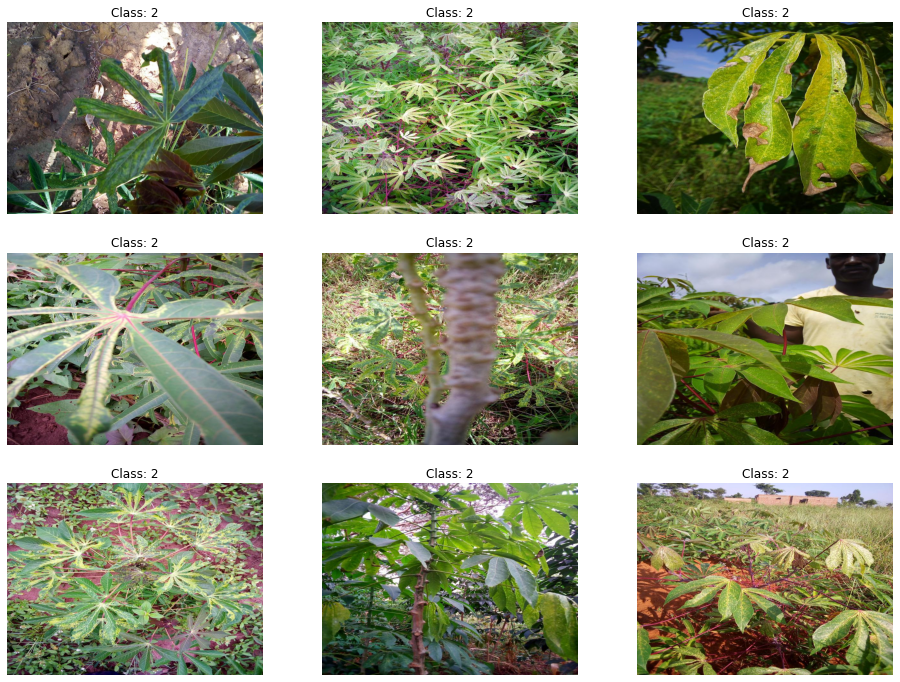

In [12]:
tmp_df = df_train[df_train["label"] == 2]
print(f"Total train images for class 2: {tmp_df.shape[0]}")

tmp_df = tmp_df.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["label"].values

visualize_batch(image_ids, labels)

<a id="6"></a>
<h2 style='background:#5BEB9C; border:0; color:black'><center>Cassava Mosaic Disease (CMD)<center><h2>

<img style="height:300px" src="https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F1865449%2F36990f77ded6667e5c30d19b5405d4d3%2Fmosaic_disease.jpeg?generation=1605829705010773&alt=media">
<cite>The image from discussion: <a href="https://www.kaggle.com/c/cassava-leaf-disease-classification/discussion/198143">Cassava Lead Diseases: Overview</a></cite>

Total train images for class 3: 13158


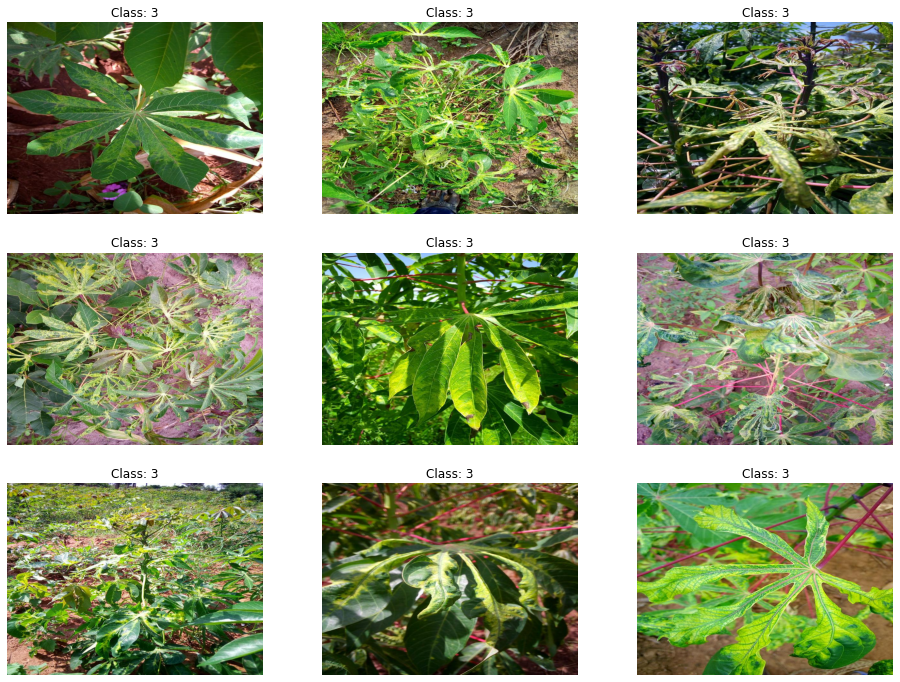

In [13]:
tmp_df = df_train[df_train["label"] == 3]
print(f"Total train images for class 3: {tmp_df.shape[0]}")

tmp_df = tmp_df.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["label"].values

visualize_batch(image_ids, labels)

<a id="6"></a>
<h2 style='background:#5BEB9C; border:0; color:black'><center>Healthy<center><h2>

Total train images for class 4: 2577


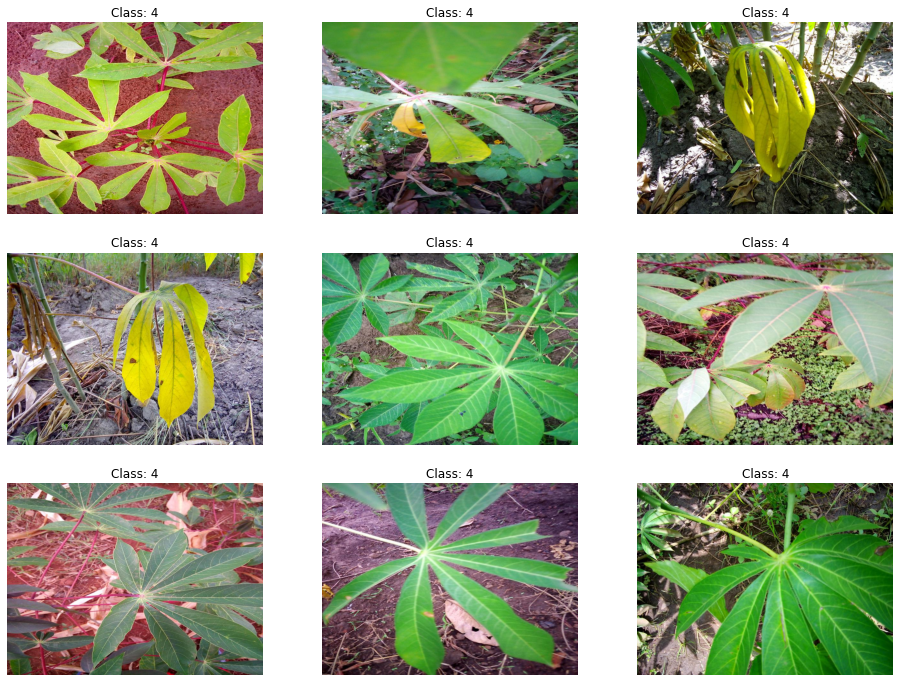

In [14]:
tmp_df = df_train[df_train["label"] == 4]
print(f"Total train images for class 4: {tmp_df.shape[0]}")

tmp_df = tmp_df.sample(9)
image_ids = tmp_df["image_id"].values
labels = tmp_df["label"].values

visualize_batch(image_ids, labels)

<a id="50"></a>
<h2 style='background:#5BEB9C; border:0; color:black'><center>Augmentation examples<center><h2>

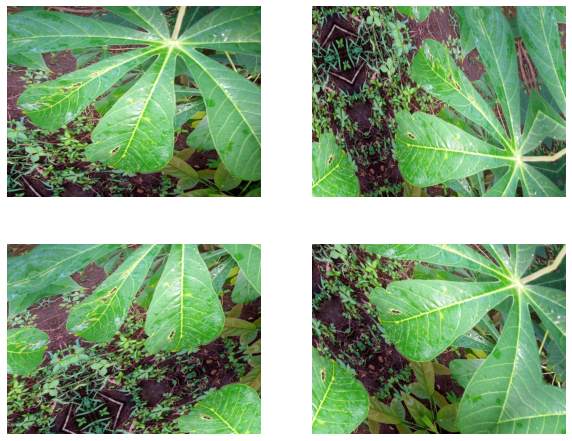

In [15]:
transform = A.ShiftScaleRotate(
    p=1.0, 
    shift_limit=(-0.3, 0.3), 
    scale_limit=(-0.1, 0.1), 
    rotate_limit=(-90, 90), 
    interpolation=0, 
    border_mode=4, 
)

plt.figure(figsize=(10, 8))
img = cv2.imread(os.path.join(BASE_DIR, "train_images", "1003442061.jpg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.axis("off")

plt.subplot(2, 2, 2)
x = transform(image=img)["image"]
plt.imshow(x)
plt.axis("off")

plt.subplot(2, 2, 3)
x = transform(image=img)["image"]
plt.imshow(x)
plt.axis("off")

plt.subplot(2, 2, 4)
x = transform(image=img)["image"]
plt.imshow(x)
plt.axis("off")

plt.show()

<a id="100"></a>
<h2 style='background:#5BEB9C; border:0; color:black'><center>Submission Example<center><h2>

Load the submission template

In [16]:
df_sub = pd.read_csv("../input/cassava-leaf-disease-classification/sample_submission.csv", index_col=0)
df_sub

label
image_id             
2216849948.jpg      4

As we can see only one file in the submission file

In [17]:
os.listdir(os.path.join(BASE_DIR, "test_images"))

['2216849948.jpg']

This is because [it is a Code Competition](https://www.kaggle.com/c/cassava-leaf-disease-classification/overview/code-requirements), and the test data is hidden   
Your notebook should correct working with unseen test dataset

Let's choose the most popular class of training set as the label for all images in test set

In [18]:
df_sub["label"] = 3

Write result to the submission file

In [19]:
df_sub.to_csv("submission.csv")

# WORK IN PROGRESS...